<font color='red'>$\Huge{\textbf{School of Computational Techniques}}$
$\Huge{\textbf{for Physics Students in Kenya}}$

$\Huge{\text{Introduction to Statistical Data Analysis}}$

Christina Agapopoulou,
Kiplabat Tarus

# Second lecture: Basic statistical properties of data



---

Before we get started - some answers from the questions of yesterday

1. How do we add error bars to plots?

---



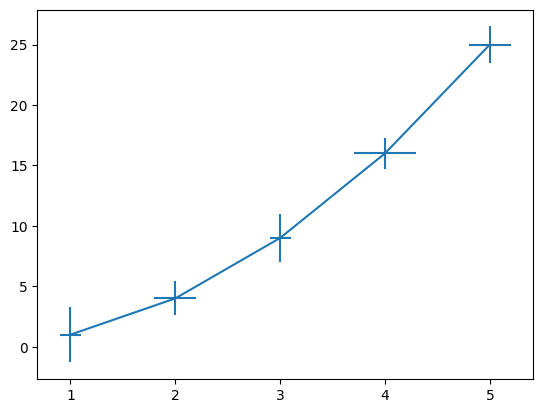

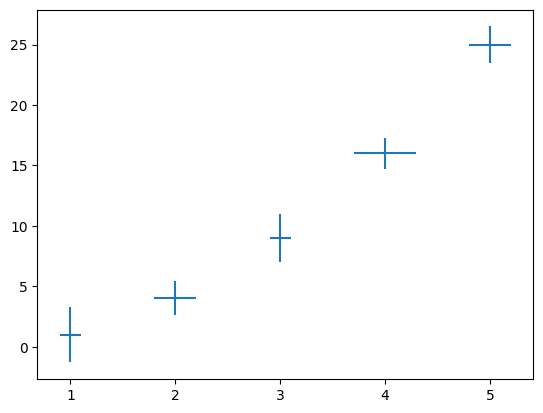

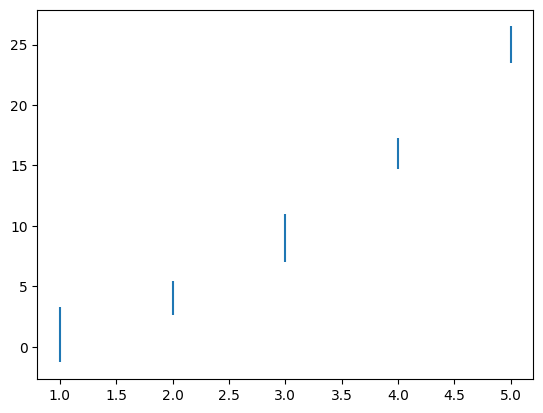

In [ ]:
import matplotlib.pyplot as plt

# Random sample data
x = [1, 2, 3, 4, 5] # add an extra point here, see what happens!
y = [1, 4, 9, 16, 25] # add an extra point here, see what happens!
x_error = [0.1, 0.2, 0.1, 0.3, 0.2]
y_error = [2.3, 1.4, 2., 1.3, 1.5]

# Create a plot
plt.errorbar(x, y, xerr=x_error, yerr=y_error)
plt.show()

# Plot without connecting line
plt.errorbar(x, y, xerr=x_error, yerr=y_error, linestyle='')
plt.show()

#Plot only y error bars

plt.errorbar(x, y, yerr=y_error, linestyle='')
plt.show()

# Show the plot
plt.show()



---

2. How to increase size of tick-marks and labels

---



In [ ]:
import matplotlib.pyplot as plt

# Create the same plot
plt.errorbar(x, y, xerr=x_error, yerr=y_error, linestyle='')

# Increase tick mark and axis label font sizes
plt.tick_params(labelsize=16)
plt.xlabel("X Axis", fontsize=16)
plt.ylabel("Y Axis", fontsize=16)

# Show the plot
plt.show()



### Measures of Central Tendency
Lets go to the very basics, the foundations of statistics.




### **Mean, Median & Mode**

The *mean* or *expectation value* of *x* can be seen as the average of the possible values *x* can take. The *mean* is often denoted as μ.

The *median* is the middle value of our data-set. Meaning that we will have equal number of data before and after the median.

The *mode* of a PDF is the value of *x* where the PDF gets its maximum value, i.e. the most probable value of our distribution.



---



Let's consider a very simple data-set:

In [ ]:
data = [0, 1, 2, 3, 4, 5, 6, 0]




---

Can you try to implement the mean, median and mode definitions in python?

---



In [ ]:
# Define mean, mode and median using the following functions?
#import numpy as np
#help(sum)
#help(len)
#help(sorted)
#help(max)
#np.mean(data)
#sum(data)
#np.var(data)
#stats.mode(data)

In [ ]:
mean = sum(data) / len(data)

print(f"Mean: {mean}")
median = sorted(data)[len(data) // 2]
print(f"Median: {median}")
#mode = max(data, key=data.count)
#print(f"Mode: {mode}")

Mean: 2.625
Median: 3




---

Our data analysis libraries actually have built-in functions to calculate the mean, mode and median variables!

SciPy is a python library that builds on top of NumPy, and provides optimised functions for integration, extrapolation and statistical analysis.

---



In [ ]:
# Definition of mean, median and mode using Numpy and Scipy
mean = np.mean(data)
# help(np.mean)
print(f"Mean: {mean}")

median = np.median(data)
# help(np.median)
print(f"Median: {median}")

from scipy import stats

mode = stats.mode(data)
# help(stats.mode)
print(f"Mode: {mode.mode}")

Mean: 2.625
Median: 2.5
Mode: 0




---

The mean and mode seem very similar, but that may not always be the case!

---



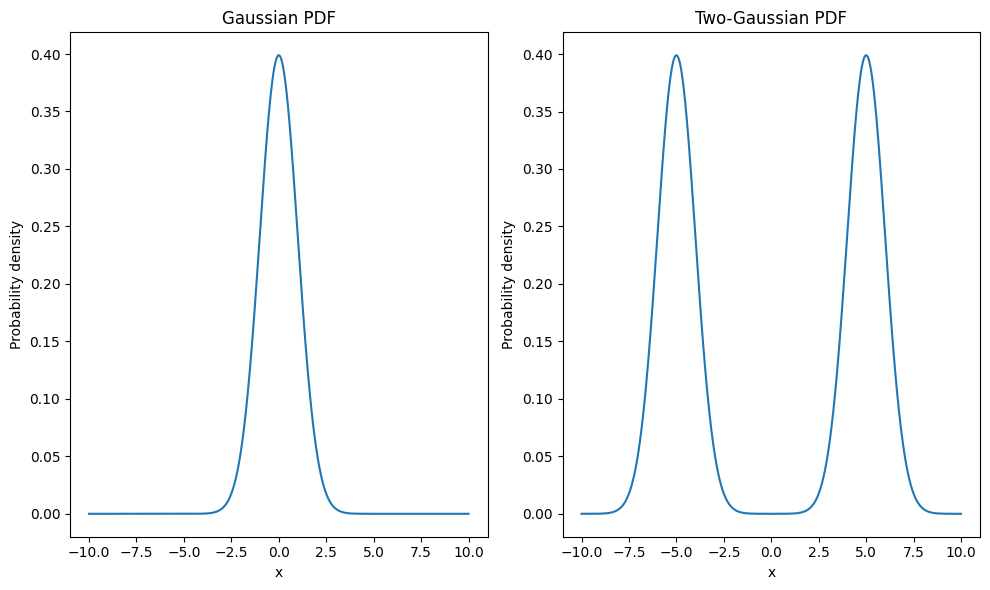

Gaussian PDF:
  Mean: 0.000
  Mode: -0.010
Two-Gaussian PDF:
  Mean: 0.000
  Mode: -4.995


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the PDFs in functions
def gaussian_pdf(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

def two_gaussian_pdf(x, mu1, sigma1, mu2, sigma2):
    return 1/(sigma1 * np.sqrt(2 * np.pi)) * np.exp(-(x - mu1)**2 / (2 * sigma1**2)) + 1/(sigma2 * np.sqrt(2 * np.pi)) * np.exp(-(x - mu2)**2 / (2 * sigma2**2))

# Create the x-axis for the PDF plots
x = np.linspace(-10, 10, 1000)

# Plot the data and the PDFs
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(x, gaussian_pdf(x, 0, 1))
plt.xlabel('x')
plt.ylabel('Probability density')
plt.title('Gaussian PDF')

plt.subplot(1, 2, 2)
plt.plot(x, two_gaussian_pdf(x, -5, 1, 5, 1))
plt.xlabel('x')
plt.ylabel('Probability density')
plt.title('Two-Gaussian PDF')

plt.tight_layout()
plt.show()

# Calculate the mean and mode for each PDF
gaussian_mean = np.mean(x)
gaussian_mode = x[np.argmax(gaussian_pdf(x, 0, 1))]

two_gaussian_mean = np.mean(x)
two_gaussian_mode = x[np.argmax(two_gaussian_pdf(x, -5, 1, 5, 1))]

print("Gaussian PDF:")
print(f"  Mean: {gaussian_mean:.3f}")
print(f"  Mode: {gaussian_mode:.3f}")

print("Two-Gaussian PDF:")
print(f"  Mean: {two_gaussian_mean:.3f}")
print(f"  Mode: {two_gaussian_mode:.3f}")




---


We see that the mean doesn't always correspond to the most probable value of our distribution. In general, the more evenly distributed our data is, the closer the mean will correspond to the most probable value, but this assumption breaks down for un-even PDFs.


---



### **Standard deviation, RMS and variance**

In statistics, we have various ways of quantifying the spread of a distribution of data. It can often be confusing to distinguish between them, so let's try and clear up things.

* **Root Mean Square (RMS)** is the square root of the mean of the squares of the values of our dataset. It can be viewed as a measure of the magnitude of a set of numbers.

$$ RMS = \sqrt{\frac{1}{N}\sum_{i=1}^{N} x_i^2 }$$

* **Variance** measures the dispersion of a set of data points around their mean value. It is defined as the average of the squared differences from the mean.

$$ Variance(\sigma^2) = \frac{1}{N}\sum_{i=1}^{N} (x_i-\mu)^2 $$

* **Standard deviation** is the square root of the variance. It provides a measure of the average distance of each data point from the mean.

$$ Standard Deviation(\sigma) = \sqrt{\frac{1}{N}\sum_{i=1}^{N} (x_i-\mu)^2} $$

* **Standard error**  gives us the precision of a sample mean. It is calculated by dividing the the standard deviation by the square root of the sample size N

$$ SE = \frac{\sigma}{\sqrt{N}} $$

Can you try and implement their definitions using python?

---



In [ ]:
# Can you try defining and calculating the RMS, variance and standard deviation of the following small data-set?
import numpy as np

# Sample data
data = [0, 1, 2, 3, 4, 5, 6, 0]

#Python provides a libary called math, with operations for the square root:
import math
sqrt_oftwo = math.sqrt(4)
print("Square root of 4: ", sqrt_oftwo)

#Try defining and calculating the RMS, variance and standard deviation of this small data-set



---

NumPy already provides built-in functions to calculate these quantities!

---



In [ ]:
import numpy as np

# Sample data
#data = np.array([0, 1, 2, 3, 4, 5, 6, 0])
# Set the size of the dataset
data_size = 10

# Generate random data from a normal distribution
data = np.random.normal(loc=500, scale=1, size=data_size)
#print(data)
# Variance
variance = np.var(data)
print(f"Variance: {variance}")

# Standard Deviation
standard_deviation = np.std(data)
print(f"Standard Deviation: {standard_deviation}")

# Root Mean Square (RMS)
rms = np.sqrt(np.mean(data**2))
print(f"RMS: {rms}")

#calculate standard error of the mean
standard_error = np.std(data) / np.sqrt(np.size(data))
print(f'Standard error: {standard_error}')

Variance: 0.4761766232121438
Standard Deviation: 0.6900555218329492
RMS: 499.8843751315538
Standard error: 0.21821471609681684





---

Try to vary the size of the dataset and see what happens. In particular, what do we see happens to the standard error? What does this tell us?

---






---


Let's now consider a larger dataset, distributed randomly


---



In [2]:
# Generate random dataset

import numpy as np

# Set the size of the dataset
data_size = 100

# Generate random data from a normal distribution
data = np.random.normal(loc=500, scale=1, size=data_size)
# help(np.random.normal)

data = np.round(data)
# help(np.round)

In [ ]:
# Calculate and print the mean, median, mode, range, variance, standard deviation, coefficient of variation, skewness, and kurtosis

mean = np.mean(data)
# help(np.mean)
print(f"Mean: {mean}")

median = np.median(data)
# help(np.medina)
print(f"Median: {median}")

from scipy import stats

mode = stats.mode(data)
# help(stats.mode)
print(f"Mode: {mode.mode}")

range_min = np.min(data)
range_max = np.max(data)
# help(np.min)
# help(np.max)
print(f"Range: {range_min} - {range_max}")

variance = np.var(data)
#help(np.var)
print(f"Variance: {variance}")

standard_deviation = np.std(data)
# help(np.std)
print(f"Standard deviation: {standard_deviation}")

skewness = stats.skew(data)
# help(stats.skew)
print(f"Skewness: {skewness}")

kurtosis = stats.kurtosis(data)
# help(stats.kurtosis)
print(f"Kurtosis: {kurtosis}")



---

Skewness is a measure of the asymmetry of a distribution, while kurtosis tells us how heavy are the tails of a distribution comared to its tail.

---



Try:


*   Change the data size, the mean, nad standard deviation and observe what happens to the measures of central tendency.
*   Change the number of decimal places to round off the array. Use the help functionality.


### **Probability**

When we perform a measurement over and over, in a perfect world, we would expect the exact same result, right?

But, in real life, randomness comes into play: our measurement instruments may not perfect, or maybe our system has a fundemantal randomness - for example, quantum mechanics, which governs nuclear and particle physics!

In order to quantify randomness, we need to start thinking of in terms of probability. Probability is a tricky concept, but there's typically two ways to look at it:
*   Imagine performing an experiment N times. Out of those N times, we have A times an occurence of a specific result. The fraction of times that A occurs if we could perform the measurement up to infinity is our probability. This is called the Frequentist approach.
*   We can also think of probability in a subjective way, comparing it to a pre-defined hypothesis, let's call it A. The probability then corresponds to our degree of belief that the hypothesis A is true. This is often referred to as the Bayesian approach.

In both cases, we will need to relate our data to the probability concept, and we do this by using **Probability Density Functions (PDFs).**

If we imagine our experiment has an outcome that is described by a single variable *x*. The PDF describes the distribution of probabilities for observing the outcome of the experiment in the sample space of *x*. By construction: ∫f(x)dx = 1


---



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data distributed gaussianly
data = np.random.normal(loc=0, scale=1, size=100)

# Define the PDF of the gaussian distribution
def gaussian_pdf(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Create the x-axis for the PDF plot
x = np.linspace(-4, 4, 100)

# Plot the data and the PDF
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.hist(data, bins=50, density=False)
plt.xlabel('x')
plt.ylabel('Entries')
plt.title('Data histogram')

data = np.random.normal(loc=0, scale=1, size=1000)
plt.subplot(2, 2, 2)
plt.hist(data, bins=50, density=False)
plt.xlabel('x')
plt.ylabel('Entries')
plt.title('Data histogram')

data = np.random.normal(loc=0, scale=1, size=10000)
plt.subplot(2, 2, 3)
plt.hist(data, bins=50, density=False)
plt.xlabel('x')
plt.ylabel('Entries')
plt.title('Data histogram')

plt.subplot(2, 2, 4)
plt.plot(x, gaussian_pdf(x, 0, 1))
plt.xlabel('x')
plt.ylabel('Probability density')
plt.title('Probability Density Function')

plt.tight_layout()
plt.show()




---


Often our measurements are characterized not only by one, but many variables, which we want to study together. We can generalize the 1-D definition of PDFs for more than one variable. For instance, for two dimensions, *x* and *y*, we can have the PDF *f(x,y)*.   


---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
x = np.random.normal(loc=0, scale=1, size=1000)
y = np.random.exponential(scale=2, size=1000)

# Define the PDFs
def gaussian_pdf(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

def exponential_pdf(x, lam):
    return lam * np.exp(-lam * x)

# Create the x-axis for the PDF plots
x_axis = np.linspace(-4, 4, 100)
y_axis = np.linspace(0, 5, 100)

# Plot the data and the PDFs
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.scatter(x, y, s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data scatter plot')

plt.subplot(2, 2, 2)
plt.plot(x_axis, gaussian_pdf(x_axis, 0, 1))
plt.xlabel('x')
plt.ylabel('Probability density')
plt.title('PDF of x')

plt.subplot(2, 2, 3)
plt.plot(y_axis, exponential_pdf(y_axis, 1))
plt.xlabel('y')
plt.ylabel('Probability density')
plt.title('PDF of y')

plt.tight_layout()
plt.show()


## Examples of Probability Density Functions

In the following, we will explore some of the most common PDFs used in physics, and give a few examples from real data!


---




### Binomial and multinomial distributions

 When there are only two potential outcomes from our measurement, the probabilities of each are described by the *binomial* PDF. This is the "yes" or "no" , "0" or "1", "success" or "failure" distribution.

 The multinomial distribution is a generalization of the binomial,  where there are not only two outcomes but rather a discrete number of m outcomes.


---



In [ ]:
# Define the parameters for the binomial and multinomial distributions
n_trials = 10
p = 0.6
n_categories = 3

# Generate the datasets
binomial_data = np.random.binomial(n_trials, p, size=1000)
multinomial_data = np.random.multinomial(n_trials, [p, 1-p, 1-p], size=1000)

# Plot the histograms
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(binomial_data, bins=np.arange(n_trials + 2) - 0.5, edgecolor='black')
plt.xlabel('Number of successes')
plt.ylabel('Frequency')
plt.title('Binomial Distribution')

plt.subplot(1, 2, 2)
plt.hist(multinomial_data, bins=np.arange(n_trials + 2) - 0.5, edgecolor='black')
plt.xlabel('Number of successes in each category')
plt.ylabel('Frequency')
plt.title('Multinomial Distribution')

plt.tight_layout()
plt.show()


### Poisson distributions

In the limit where the number of events becomes very large, the probability of success becomes very small but hte expectation value of number of successes (i.e. N*p) stays the same, the binomial distribution transforms to the Poisson distribution.


---



In [ ]:
# Define the parameters for the Poisson distributions
lambdas = [2, 5, 10]

# Generate the datasets
data = []
for lambda_value in lambdas:
    data.append(np.random.poisson(lambda_value, size=1000))

# Plot the histograms
plt.figure(figsize=(10, 6))

for i, lambda_value in enumerate(lambdas):
    plt.subplot(1, len(lambdas), i + 1)
    plt.hist(data[i], edgecolor='black')
    plt.xlim(0,20)
    plt.xlabel('Number of events')
    plt.ylabel('Frequency')
    plt.title('Poisson Distribution (λ={})'.format(lambda_value))

plt.tight_layout()
plt.show()


### Gaussian (or normal) distributions

The Gaussian (also called normal) distribution is a special one! We will see in the next lesson why. For now, let's check how it looks like:

$f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

The parameters $\mu$ and $\sigma^2$ are also called mean and variance - the mean and variance of a Gaussian distribution give its parameters!  


---



In [ ]:
# Define the parameters for the gaussian distributions
means = [0, 5, ] # add an extra parameter here, and see what happens
sigmas = [1, 2, ] # add an extra parameter here and see what happens

# Generate the datasets
data = []
for mean, sigma in zip(means, sigmas):
    data.append(np.random.normal(loc=mean, scale=sigma, size=1000))

# Plot the histograms
plt.figure(figsize=(10, 6))

for i, (mean, sigma) in enumerate(zip(means, sigmas)):
    plt.subplot(1, len(means), i + 1)
    plt.hist(data[i], edgecolor='black')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Gaussian Distribution (μ={}, σ={})'.format(mean, sigma))

plt.tight_layout()
plt.show()


What are trends and observations you have on the Gaussian PDF? How does it change when we vary its parameter?

---





---

The distribution of events in Gaussian is also important to know. How many events are contained within 1, 2 or 3 standard deviations?

---



In [ ]:
# Define the parameters for the gaussian distribution
mean = 20
sigma = 5

# Generate the data
data = np.random.normal(loc=mean, scale=sigma, size=10000)

# Calculate the 1 and 2 sigma limits
sigma_1p = mean + sigma
sigma_1m = mean - sigma
sigma_2p = mean + 2 * sigma
sigma_2m = mean - 2 * sigma
sigma_3p = mean + 3 * sigma
sigma_3m = mean - 3 * sigma

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data, edgecolor='black', bins=50)
plt.xlim(mean-10*sigma, mean+10*sigma)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Gaussian Distribution (μ={}, σ={})'.format(mean, sigma))

# Add vertical lines for the 1, 2 and 3 sigma limits
plt.axvline(x=sigma_1p, color='orange', linestyle='--')
plt.axvline(x=sigma_2p, color='red', linestyle='--')
plt.axvline(x=sigma_3p, color='green', linestyle='--')
# Add vertical lines for the 1 and 2 sigma limits
plt.axvline(x=sigma_1m, color='orange', linestyle='--')
plt.axvline(x=sigma_2m, color='red', linestyle='--')
plt.axvline(x=sigma_3m, color='green', linestyle='--')

plt.tight_layout()
plt.show()


In [ ]:
# Set the limit
limit = 1 * sigma

# Calculate the percentage of items within the limit
percentage = (np.abs(data - mean) < limit).mean() * 100

# Print the result
print(f"Percentage of items within {limit}: {percentage:.2f}%")




---

Can you check for the 2 and 3 sigma percentages?

---





---

### Extra exercise

Can you think of any more PDFs?  How would you go about generating data distributed according to them?


---



### The Central Limit Theorem


---



The central limit theorem states that, in the limit of large sampling, no matter what the distribution of the samples, their means are distributed by a Gaussian whose mean is the mean of the distribution and whose standard deviation decreases as $1/sqrt{n}$.

What does this tell us in practice? It tells us that if we measure a quantity over and over many times, its mean will be a Gaussian distributed variable centered around the true value - even if the quantity is not distributed gaussianly! And the more measurements we take, the less fluctuations we will get  when averaging.

Let's see how this works in practice.


---



In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define how many experiments we're going to generate, and how many events each will have
n = 1
sample_size = 10000

# Generate random samples from a normal distribution, each sample has 10000 events
samples = np.random.normal(loc=0, scale=1, size=(n, sample_size))
# Calculate the mean and standard deviation for the array of sample means
sample_mean = np.mean(samples[0])
sample_std = np.std(samples[0])

print("Mean of 1st sample: %.3f" % samples_mean)
print("Standard deviation of 1st sample: %.3f"% sample_std)


plt.hist(samples[0], bins=50, edgecolor='black')
plt.show()

NameError: name 'samples_mean' is not defined



---


We have generated a random sample, of 10000 events, distributed gaussianly. How would we go about checking that the CLT is valid?


---



In [ ]:
# This is the array of the means of each sample
sample_means = np.mean(samples, axis=1)

# Calculate the mean and standard deviation for the array of sample means
samples_mean = np.mean(sample_means)
samples_std = np.std(sample_means)
print("Mean of sample means: %.3f" % samples_mean)
print("Standard deviation of sample means %.3f"% samples_std)

# Plot the histogram of sample means
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=20, edgecolor='black', density=True)
plt.show()



---

It feels natural that the CLT holds for Gaussian distributions. But let's check that it really works for other types of distributions as well!

---



In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define how many experiments we're going to generate, and how many events each will have
n = 1
sample_size = 10000
# Generate random samples from a normal distribution, each sample has 10000 events

samples = np.random.uniform(low=0, high=1, size=(n, sample_size))

plt.hist(samples[0], bins=50, edgecolor='black', density=True)

plt.title('Example of the uniform distribution')
plt.show()

# This is the array of the means of each sample
sample_means = np.mean(samples, axis=1)

# Calculate the mean and standard deviation for the array of sample means
samples_mean = np.mean(sample_means)
samples_std = np.std(sample_means)
print("Mean of sample means: %.3f" % samples_mean)
print("Standard deviation of sample means %.3f"% samples_std)

# Plot the histogram of sample means
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=20, edgecolor='black', density=True)
# Add labels and legend
plt.title('Histogram of Sample Means of a Uniform Distribution')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()




---


There are situations where the CLT does not work well, typically when the sample size is too small or the underlying distribution has infinite variance (such as Cauchy distribution).


---



In [ ]:
# prompt: Show me an example of the Central Limit Theorem not working

import numpy as np
import matplotlib.pyplot as plt

# Number of samples to draw from the Cauchy distribution
sample_size = 1000

# Number of experiments to perform
num_experiments = 1000

# Draw samples from a Cauchy distribution
data = np.random.standard_cauchy((num_experiments, sample_size))

plt.hist(samples[0], bins=50, edgecolor='black')
plt.title('Example of the Cauchy distribution')
plt.show()

# Compute the means of these samples
sample_means = np.mean(data, axis=1)


# Plot the histogram of the sample means
plt.hist(sample_means, bins=100, range=[-10, 10], density=True, alpha=0.75, color='b', edgecolor='black')


# Add labels and legend
plt.title('Histogram of Sample Means of Cauchy Distribution')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()



---


We see that the Gaussian fit doesn't manage to describe well or distribution of sample means.

**Explanation**: The Cauchy distribution is known for its heavy tails and undefined variance and mean.
In the example, we draw sample_size samples from a standard Cauchy distribution for num_experiments times.
We then compute the mean of each set of samples.
Finally, we plot the histogram of these sample means.
What happens:
Unlike distributions with finite variance, the sample means from a Cauchy distribution do not converge to a normal distribution as the sample size increases.
Instead, they remain heavy-tailed and do not exhibit the normal distribution behavior predicted by the CLT. The CLT has its limitations.


---

